In [2]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [3]:
def r_scatter(r):
    plots.figure(figsize=(5,5))
    "Generate a scatter plot with a correlation approximately r"
    x = np.random.normal(0, 1, 1000)
    z = np.random.normal(0, 1, 1000)
    y = r*x + (np.sqrt(1-r**2))*z
    plots.scatter(x, y, color='darkblue', s=20)
    plots.xlim(-4, 4)
    plots.ylim(-4, 4)

## Visualization ##

**Please run all cells before this cell, including the import cell at the top of the notebook.**

In [4]:
galton = Table.read_table('galton.csv')

In [5]:
heights = Table().with_columns(
    'MidParent', galton.column('midparentHeight'),
    'Child', galton.column('childHeight')
    )

In [6]:
heights

MidParent,Child
75.43,73.2
75.43,69.2
75.43,69
75.43,69
73.66,73.5
73.66,72.5
73.66,65.5
73.66,65.5
72.06,71
72.06,68


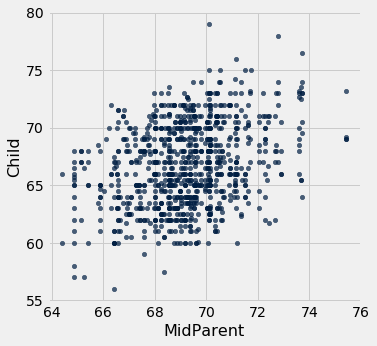

In [7]:
heights.scatter('MidParent') #somewhat linear and positive relation

In [8]:
hybrid = Table.read_table('hybrid.csv')

In [9]:
hybrid

vehicle,year,msrp,acceleration,mpg,class
Prius (1st Gen),1997,24509.7,7.46,41.26,Compact
Tino,2000,35355,8.2,54.1,Compact
Prius (2nd Gen),2000,26832.2,7.97,45.23,Compact
Insight,2000,18936.4,9.52,53,Two Seater
Civic (1st Gen),2001,25833.4,7.04,47.04,Compact
Insight,2001,19036.7,9.52,53,Two Seater
Insight,2002,19137,9.71,53,Two Seater
Alphard,2003,38084.8,8.33,40.46,Minivan
Insight,2003,19137,9.52,53,Two Seater
Civic,2003,14071.9,8.62,41,Compact


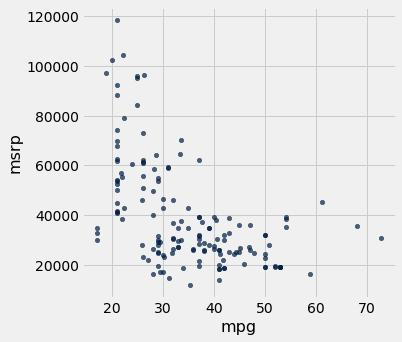

In [10]:
hybrid.scatter('mpg', 'msrp') # non-linear and negative relation

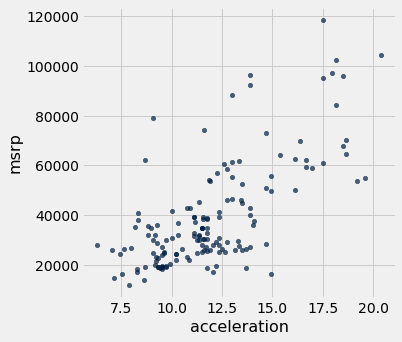

In [11]:
hybrid.scatter('acceleration', 'msrp') # close to linear and positive. NOTE!!!!! We are not suggesting causation here! 
                                                                                    #Just correlation.

In [12]:
# What happens when we restrict the data to be homogenous (meaning it represents similar type of data, say SUVs only?)

suv = hybrid.where('class', 'SUV')
suv.num_rows

39

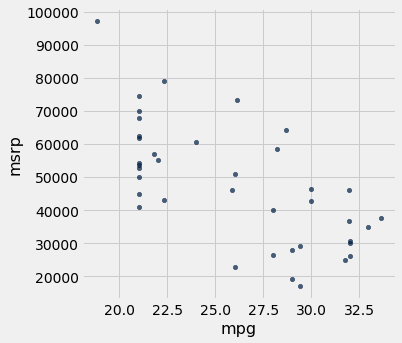

In [13]:
suv.scatter('mpg', 'msrp') # If we restrict to homogenous subsets of population, the trend might be different.

In [14]:
# To translate set of values into standard units, subtract average and divide by standard deviation
def standard_units(x):
    "Convert any array of numbers to standard units."
    return (x - np.average(x)) / np.std(x)

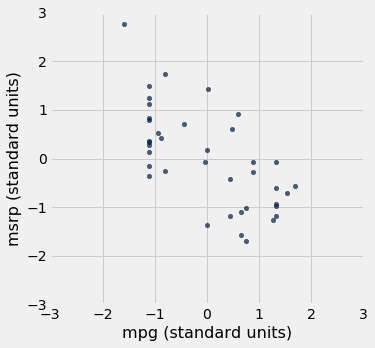

In [15]:
# The probability distribution of a data set will look pretty much similar to that of its standard units representation.

Table().with_columns(
    'mpg (standard units)',  standard_units(suv.column('mpg')), 
    'msrp (standard units)', standard_units(suv.column('msrp'))
).scatter(0, 1)
plots.xlim(-3, 3)
plots.ylim(-3, 3);

## Calculation ##

**Please run all cells before this cell, including the previous example cells and the import cell at the top of the notebook.**

#### The correlation coefficient (r) of a set of two variable is defined as the degree of LINEARITY between the two variables (aka how clustered the data is around a STRAIGHT LINE).
#### If r = 1, there is a perfectly positive LINEAR correlation
#### If r = -1, there is perfectly negative LINEAR correlation
#### If r = 0, the two variables are not LINEARLY correlated, BUT THERE COULD BE OTHER TYPES of correlation between them!!

NOTE: r does not have any units and is calculated from STANDARD UNITS of the two variables. It remains unaffected if the units of the two variables are changed (e.g weight in Kg vs Lb. etc). It also remains unaffected if the two variables are interchanged either in histogram representation or mathematical calculation.

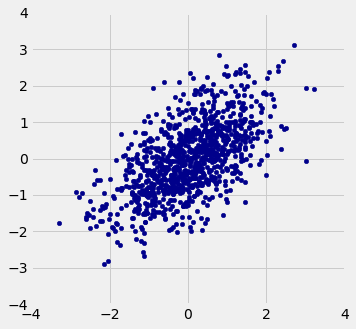

In [16]:
# Draws a scatter diagram of variables that have the specified correlation

r_scatter(0.6)

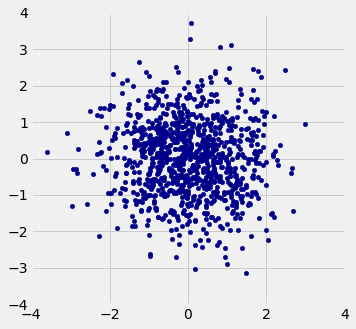

In [17]:
r_scatter(0) # Not LINEARLY correlated. Other types of correlations may exist!

### Calculating $r$ ###

#### In order to calculate r, follow these steps:-
1. Represent each variable (x, y) in standard units
2. Multiply the standard unit representations of x and y from step 1
3. Take the mean of the newly calculated column. That is r.

In [18]:
x = np.arange(1, 7, 1)
y = make_array(2, 3, 1, 5, 2, 7)
t = Table().with_columns(
        'x', x,
        'y', y
    )
t

x,y
1,2
2,3
3,1
4,5
5,2
6,7


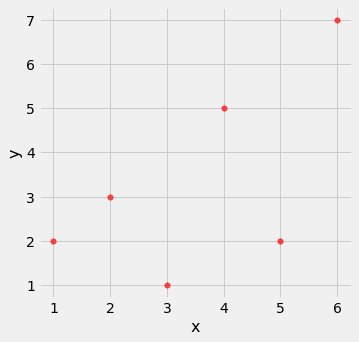

In [19]:
t.scatter('x', 'y', s=30, color='red')

In [20]:
t= t.with_columns(
        'x (standard units)', standard_units(x),
        'y (standard units)', standard_units(y)
    )
t

x,y,x (standard units),y (standard units)
1,2,-1.46385,-0.648886
2,3,-0.87831,-0.162221
3,1,-0.29277,-1.13555
4,5,0.29277,0.811107
5,2,0.87831,-0.648886
6,7,1.46385,1.78444


In [21]:
su_product = t.column(2) * t.column(3)
t = t.with_column('product of standard units', su_product)
t

x,y,x (standard units),y (standard units),product of standard units
1,2,-1.46385,-0.648886,0.949871
2,3,-0.87831,-0.162221,0.142481
3,1,-0.29277,-1.13555,0.332455
4,5,0.29277,0.811107,0.237468
5,2,0.87831,-0.648886,-0.569923
6,7,1.46385,1.78444,2.61215


In [22]:
# r is the average of the products of standard units

r = np.mean(t.column(4))
r

0.6174163971897709

#### Let's create a function that does all of the above for a given data table and perform some checks.

In [23]:
def correlation(tbl, x, y):
    """tbl is a table; 
    x and y are column labels"""
    x_in_standard_units = standard_units(tbl.column(x))
    y_in_standard_units = standard_units(tbl.column(y))
    return np.average(x_in_standard_units * y_in_standard_units)  

In [24]:
correlation(t, 'x', 'y')

0.6174163971897709

In [25]:
correlation(suv, 'mpg', 'msrp')

-0.6667143635709919

In [26]:
correlation(t, 'x', 'y')

0.6174163971897709

In [27]:
correlation(t, 'y', 'x')

0.6174163971897709

##### Does interchanging the variables have any effect on r (or the correlation when shown in a visualization??)

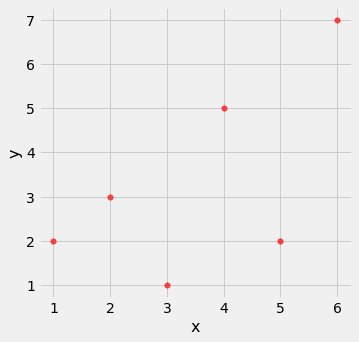

In [28]:
t.scatter('x', 'y', s=30, color='red')

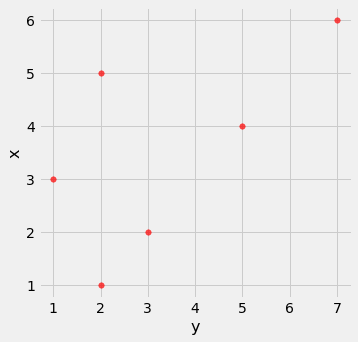

In [29]:
t.scatter('y', 'x', s=30, color='red')

In [30]:
correlation(t, 'y', 'x')

0.6174163971897709

## Interpretation ##

**Please run all cells before this cell, including the previous example cells and the import cell at the top of the notebook.**

### Nonlinearity ###

#### There is no point in calculating correlation coefficient r if the visual distribution of the data is NON-LINEAR. So, always visualize the data before deciding whether to calculate r or not. r is also heavily influenced by outliers, so use the same technique to check for outliers as well. Don't just exclude them from your analysis completely! Analyse them separately from rest of the data!

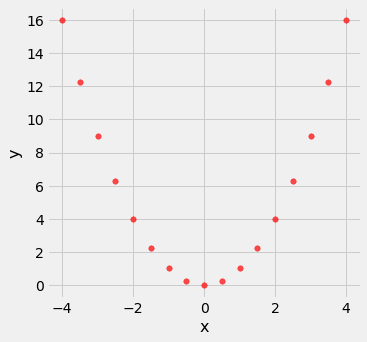

In [33]:
new_x = np.arange(-4, 4.1, 0.5)
nonlinear = Table().with_columns(
        'x', new_x,
        'y', new_x**2
    )
nonlinear.scatter('x', 'y', s=30, color='r')

In [35]:
correlation(nonlinear, 'x', 'y') # r is zero!!

0.0

### Outliers ###

#### Let's start with a perfectly linear sample data and calculate correlation coefficient

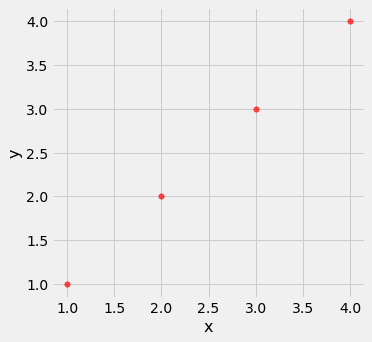

In [39]:
line = Table().with_columns(
        'x', make_array(1, 2, 3, 4),
        'y', make_array(1, 2, 3, 4)
    )
line.scatter('x', 'y', s=30, color='r')

In [40]:
correlation(line, 'x', 'y')

1.0

#### Now introduce an outlier and observe the correlation coefficient!

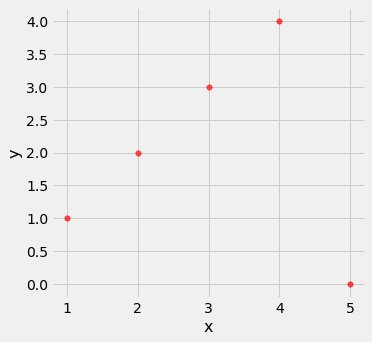

In [41]:
outlier = Table().with_columns(
        'x', make_array(1, 2, 3, 4, 5),
        'y', make_array(1, 2, 3, 4, 0)
    )
outlier.scatter('x', 'y', s=30, color='r')

In [43]:
correlation(outlier, 'x', 'y') #WHATTTTTTT!!!!!??????

0.0

### Ecological Correlation ###

####  Sometimes, when the data is represented in aggregates, it masks the ACTUAL trends and patterns in the underlying data, resulting in incorrect predictions. Take this example of Average SAT scores for 2014 for each of 50 states (+ DC). Predictions for an INDIVIDUAL test-taker's future scores will be incorrect if purely based on this aggregated data set. Watch out for such aggretaed data too!!

In [44]:
sat2014 = Table.read_table('sat2014.csv').sort('State')
sat2014

State,Participation Rate,Critical Reading,Math,Writing,Combined
Alabama,6.7,547,538,532,1617
Alaska,54.2,507,503,475,1485
Arizona,36.4,522,525,500,1547
Arkansas,4.2,573,571,554,1698
California,60.3,498,510,496,1504
Colorado,14.3,582,586,567,1735
Connecticut,88.4,507,510,508,1525
Delaware,100,456,459,444,1359
District of Columbia,100,440,438,431,1309
Florida,72.2,491,485,472,1448


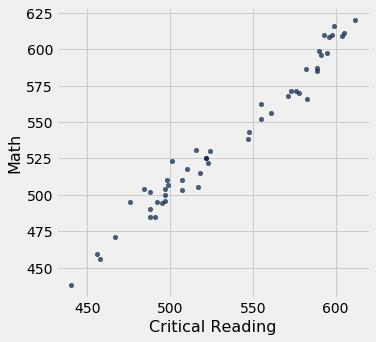

In [45]:
sat2014.scatter('Critical Reading', 'Math')

In [46]:
correlation(sat2014, 'Critical Reading', 'Math')

0.9847558411067434